In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1: Small dataset (Autograded)

### Problem 1.1. Loading the Data

In [2]:
X = np.load('./data/p1/X.npy')
y = np.load('./data/p1/y.npy')

In [3]:
X.shape, y.shape, np.max(X[:,0])

((511, 45768), (511,), 11.941397591320595)

In [4]:
print('# rows in X=\n', X.shape[0])
print('# cols in X=\n', X.shape[1])
print('largest entry in 1-st col=\n', np.max(X[:,0]))

# rows in X=
 511
# cols in X=
 45768
largest entry in 1-st col=
 11.941397591320595


###  Problem 1.2. Transform the Data
- Due to the presence of genes with extremely high magnitudes of expression in only a few cells, it is common to apply a log-transform to the data, that is, to apply the transform  log2(𝑥+1) . Apply this transform to each entry in the raw data.

- What is the value of the largest entry in the first column of the processed data matrix?

In [5]:
X_trans_log = np.log2(X+1)
print('largest entry in 1-st col=\n', np.max(X_trans_log[:,0]))

largest entry in 1-st col=
 3.6939215228197613


### Problem 1.3. Principal Components and Explained Variance
- For both the raw data and processed version, what percentage of the variance is explained by the first principal component?
    - Enter an answer between  0 and  1 .
        - Percentage variance explained raw
        - Percentage variance explained log-transformed
- How many PC's are needed to explain 85% of the variance for both raw and processed data? To get a better idea of how the explained variance grow as more PCs are included, plot the cumulative explained variance versus number of PCs.

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca_raw = PCA()
pca_raw.fit(X)
pca_log = PCA()
pca_log.fit(X_trans_log)

PCA()

In [8]:
# Percentage variance explained
explained_variance_ratio_raw = pca_raw.explained_variance_ratio_
explained_variance_ratio_log = pca_log.explained_variance_ratio_
print('variance explained raw of first principal component=\n', np.max(explained_variance_ratio_raw))
print('variance explained log-transformed of first principal component=\n', np.max(explained_variance_ratio_log))

variance explained raw of first principal component=
 0.42779670983572654
variance explained log-transformed of first principal component=
 0.1388756487082621


In [9]:
# How many PC's are needed to explain 85% of the variance
cumulation_ratio_raw = 0
for i in range(len(explained_variance_ratio_raw)):
    cumulation_ratio_raw += explained_variance_ratio_raw[i]
    if cumulation_ratio_raw > 0.85:
        print(f'# needed =\n {i+1}')
        print('cumulation_ratio_raw =\n', cumulation_ratio_raw)
        break

cumulation_ratio_log = 0
for j in range(len(explained_variance_ratio_log)):
    cumulation_ratio_log += explained_variance_ratio_log[j]
    if cumulation_ratio_log > 0.85:
        print(f'# needed =\n {j+1}')
        print('cumulation_ratio_raw =\n', cumulation_ratio_log)
        break       

# needed =
 36
cumulation_ratio_raw =
 0.8500942561971226
# needed =
 339
cumulation_ratio_raw =
 0.8502513345458097


### Problem 1.4. Plotting without Visualization Technique
- From now on, we work with the processed data , that is, the data after we apply the log transformation.
- We first try to visualize the data with no specialized techniques. Make a scatterplot with the first and second coordinates of the data as the axes.


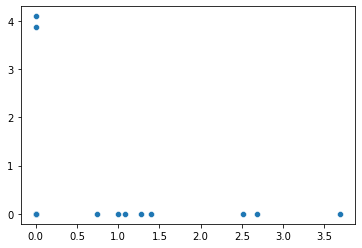

In [10]:
# scatterplot with the first and second coordinates
sns.scatterplot(x=X_trans_log[:,0], y=X_trans_log[:,1])
plt.show()

### Problem 1.5. PCA
- Now find the top two principal components, and make a scatterplot of the projections of the data onto these two PC's.

In [27]:
# scatterplot of the projected data onto top two principal components.
pca_log_top2 = PCA(n_components=2)
pca_log_top2.fit(X_trans_log)
X_log_pcatop2 = pca_log_top2.transform(X_trans_log)

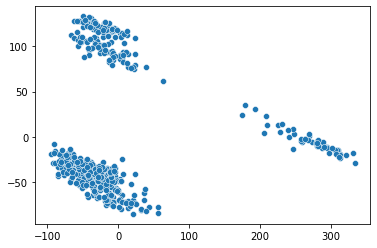

In [28]:
sns.scatterplot(x=X_log_pcatop2[:,0], y=X_log_pcatop2[:,1])
plt.show()

### Problem 1.6. MDS
- Use the sklearn implementation of MDS to visualize the data in two dimensions.

In [22]:
from sklearn.manifold import MDS

In [29]:
mds_log_2d = MDS(n_components=2)
X_log_mds2d = mds_log_2d.fit_transform(X_trans_log)

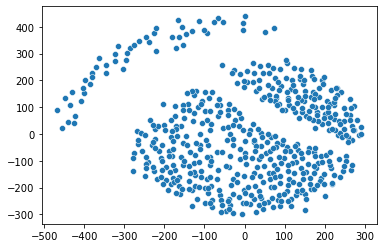

In [30]:
sns.scatterplot(x=X_log_mds2d[:,0], y=X_log_mds2d[:,1])
plt.show()

### Problem 1.7. T-SNE
- Project the data onto the top  50  PC's and run T-SNE with a perplexity value of  40  on the projected data to visualize the data in two dimensions.

In [35]:
from sklearn.manifold import TSNE

In [93]:
X_log_pcatop50.shape

(511, 50)

In [99]:
# PC 50 projection
pca_log_top50 = PCA(n_components=50)
pca_log_top50.fit(X_trans_log)
X_log_pcatop50 = pca_log_top50.transform(X_trans_log)
print(X_log_pcatop50.shape)
# perplexity value of  40, two dimensions
tsne = TSNE(n_components=2, perplexity=40)
X_log_tsne = tsne.fit_transform(X_log_pcatop50)

(511, 50)


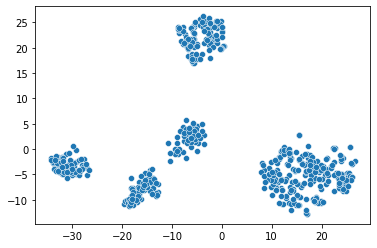

In [100]:
sns.scatterplot(x=X_log_tsne[:,0], y=X_log_tsne[:,1])
plt.show()

### Problem 1.8. Visualizing K-means Clustering
- As above, we continue to use the log-transformed data projected onto the top  50  PC's .
- Run K-Means on the projected data with the number of clusters by selected by looking at the T-SNE plot.
- Redo the PCA, MDS, and T-SNE plots from previous part, but now with colors representing the different cluster identities (e.g. use 10 colors if there are 10 clusters).

In [101]:
from sklearn.cluster import KMeans

In [102]:
k = 5
kmeans = KMeans(n_clusters=5).fit(X_log_pcatop50)
# kmeans.labels_

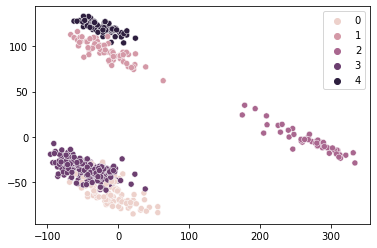

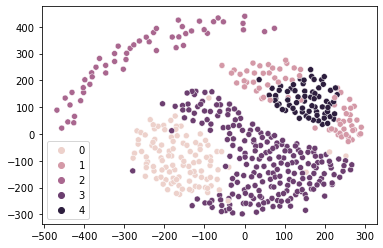

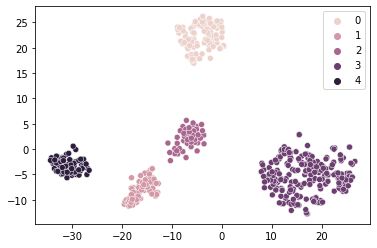

In [103]:
# PCA 2
sns.scatterplot(x=X_log_pcatop2[:,0], y=X_log_pcatop2[:,1],hue=kmeans.labels_)
plt.show()
# MDS 2-d
sns.scatterplot(x=X_log_mds2d[:,0], y=X_log_mds2d[:,1],hue=kmeans.labels_)
plt.show()
# init=pc50, perplexity value of  40, two dimensions
sns.scatterplot(x=X_log_tsne[:,0], y=X_log_tsne[:,1],hue=kmeans.labels_)
plt.show()

### Problem 1.9. Elbow Method
- Use the elbow method to select a number of clusters. In other words, plot the K-Means clustering criterion  WGSS  versus the number of clusters  𝐾 , and find the number of cluster after the last big drop of the curve. (Different reasonable answers will be accepted.)

Python tip: You may use the inertia_ attribute of sklearn.cluster.KMeans for  WGSS .

In [114]:
WGSS_hist=[]
for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(X_log_pcatop50)
    WGSS_hist.append(kmeans.inertia_)
WGSS_hist= np.array(WGSS_hist)

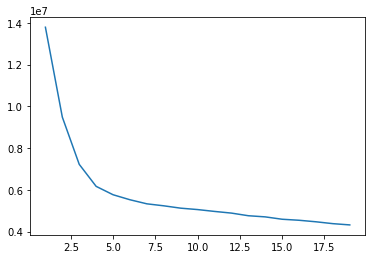

In [117]:
sns.lineplot(x=range(1,20), y=WGSS_hist)
plt.show()

In [116]:
WGSS_hist[4]

5762253.611630614

### Problem 1.10. (Optional Ungraded): Hierarchical Clustering

Recall a dendrogram is the a tree depicting the hierarchy of clustering into increasing numbers of clusters.

Create a dendrogram using the Ward criterion from the projected data. Explain the structure of the data using the dendrogram. Explore the changes in the dendrogram using different linkages. (There is no answer box for this question, and you don't need to include this part in your written response.)

We recommend using R instead of Python for this. See the recitation for an example.

### Problem 1.11. Visualizing cluster means
Compute the mean value of the data points in each cluster that you found using K-means. For this computation of mean, use the data in full original dimensions instead of the PCA projections (so if the data matrix is  𝑛×𝑑  and you found  𝑘  clusters, your cluster means should be  𝑘  vectors in  𝑑 dimensions.)

Visualize the  𝑘  cluster means in 2-dimensional space using MDS and PCA. Which of the following best explains the difference between this plot and the T-SNE plot? (Choose all that apply.)

In [122]:
k = 5
kmeans = KMeans(n_clusters=5).fit(X_log_pcatop50)
kmeans_label = kmeans.labels_

In [133]:
# findin cluster means
cluster_means_log = np.vstack([np.mean(X_trans_log[kmeans_label==0], axis=0),
                               np.mean(X_trans_log[kmeans_label==1], axis=0),
                               np.mean(X_trans_log[kmeans_label==2], axis=0),
                               np.mean(X_trans_log[kmeans_label==3], axis=0),
                               np.mean(X_trans_log[kmeans_label==4], axis=0)])
cluster_means_log.shape

(5, 45768)

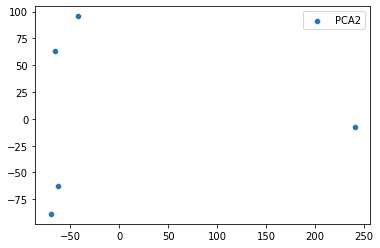

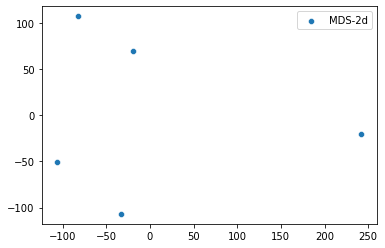

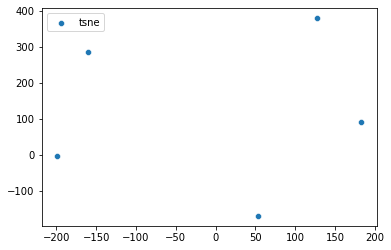

In [139]:
# PCA 2 and MDS 2-d
pca_log_top2 = PCA(n_components=2)
pca_log_top2.fit(cluster_means_log)
cluster_means_log_pcatop2 = pca_log_top2.transform(cluster_means_log)
sns.scatterplot(x=cluster_means_log_pcatop2[:,0], y=cluster_means_log_pcatop2[:,1], label='PCA2')
plt.show()

# MDS-2d
mds_log_2d = MDS(n_components=2)
cluster_means_log_mds2d = mds_log_2d.fit_transform(cluster_means_log)
sns.scatterplot(x=cluster_means_log_mds2d[:,0], y=cluster_means_log_mds2d[:,1], label='MDS-2d')
plt.show()

# perplexity value of  40, two dimensions
tsne = TSNE(n_components=2, perplexity=40)
cluster_means_log_tsne = tsne.fit_transform(cluster_means_log)

sns.scatterplot(x=cluster_means_log_tsne[:,0], y=cluster_means_log_tsne[:,1], label='tsne')
plt.show()

### 12. What if We Did Not Transform 
Perform the PCA, MDS, and T-SNE visualizations from parts 5 and 7 (with the same parameters) using the original data, before you took the log transform. Which plots look most like the plots you obtain?

In [142]:
# PCA
X_pcatop2 = pca_log_top2.fit_transform(X)
# MDS
X_mds2d = mds_log_2d.fit_transform(X)
# t-SNE
## PC 50 projection
X_pcatop50 = pca_log_top50.fit_transform(X_trans_log)
## perplexity value of  40, two dimensions
X_tsne = tsne.fit_transform(X_pcatop50)

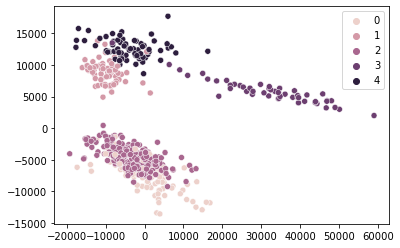

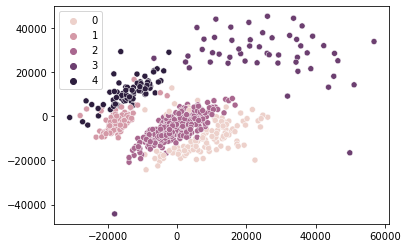

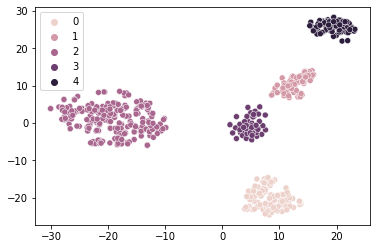

In [143]:
# PCA 2
sns.scatterplot(x=X_pcatop2[:,0], y=X_pcatop2[:,1],hue=kmeans.labels_)
plt.show()
# MDS 2-d
sns.scatterplot(x=X_mds2d[:,0], y=X_mds2d[:,1],hue=kmeans.labels_)
plt.show()
# init=pc50, perplexity value of  40, two dimensions
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],hue=kmeans.labels_)
plt.show()